In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical



In [55]:
corpus = ["I enjoy learning NLP and machine learning",
          "CBOW is an interesting model for word embeddings",
          "Understanding word context is important for NLP"]

In [56]:
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in corpus into vector of integers: ")
print(sequences)

After converting our words in corpus into vector of integers: 
[[6, 7, 1, 2, 8, 9, 1], [10, 3, 11, 12, 13, 4, 5, 14], [15, 5, 16, 3, 17, 4, 2]]


Now, we will build the CBOW model having window size = 2.



In [57]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 3

# Generate context-target pairs
contexts = []
targets = []
for seq in sequences:
  for i in range(window_size, len(seq) - window_size):
    context = seq[i-window_size:i] + seq[i+1 : i+window_size+1]
    target = seq[i]
    contexts.append(context)
    targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

In [58]:
X

array([[ 6,  7,  1,  8,  9,  1],
       [10,  3, 11, 13,  4,  5],
       [ 3, 11, 12,  4,  5, 14],
       [15,  5, 16, 17,  4,  2]])

#### Define CBOW model

In [59]:
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_size,
              input_length=2*window_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(units=vocab_size,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [61]:
model.predict(X[:1])  # Initialize weights by making a prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[0.05475593, 0.05580952, 0.0553152 , 0.05690454, 0.05541312,
        0.05582961, 0.05538801, 0.05595809, 0.05653382, 0.05560636,
        0.05522516, 0.05571789, 0.05536423, 0.05532612, 0.05448635,
        0.05517524, 0.05607831, 0.05511254]], dtype=float32)

In [62]:
# Train the model
model.fit(X, y, epochs=100, verbose=0)


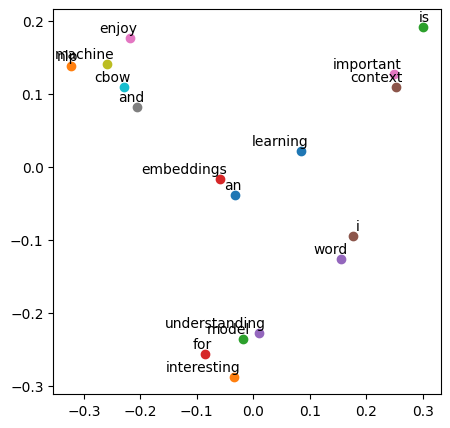

In [63]:
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()
